# Binary Classification with a Software Defects (Kaggle Competition)

Goal: Predict defects in C programs given various various attributes about the code.



# Evaluation


Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False
101761,101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [4]:
df.isna().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [5]:
df.defects.value_counts()

False    78699
True     23064
Name: defects, dtype: int64

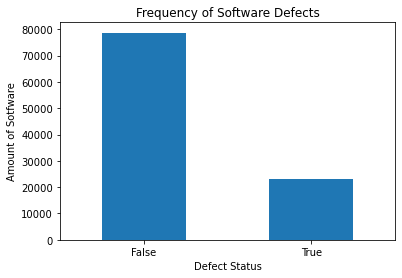

In [6]:
df.defects.value_counts().plot(kind='bar')
plt.title('Frequency of Software Defects')
plt.xlabel('Defect Status')
plt.ylabel('Amount of Sotfware')
plt.xticks(rotation=0);

In [7]:
from sklearn.preprocessing import LabelBinarizer

for col in df:
    if df[col].dtypes=='bool':
        print(f'{col} : {df[col].unique()}')

defects : [False  True]


In [8]:
lb = LabelBinarizer()

for col in df:
    if df[col].dtypes=='bool':
        df[col]=lb.fit_transform(df[col])
        print(f'{col} : {df[col].unique()}')

defects : [0 1]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [10]:
df.drop('id',axis=1,inplace=True)

In [11]:
df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,1
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,811.70,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,0
101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,11268.27,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,0
101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,5893.69,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,0
101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,1534.04,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,0


## Correlation matrix

In [12]:
corr_mat=df.corr().round(2)
corr_mat

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,1.00,0.76,0.54,0.70,0.76,0.76,-0.39,0.60,0.49,0.50,...,0.80,0.53,0.67,0.25,0.37,0.64,0.76,0.76,0.76,0.34
v(g),0.76,1.00,0.73,0.79,0.63,0.62,-0.39,0.57,0.30,0.43,...,0.64,0.38,0.46,0.21,0.39,0.53,0.64,0.61,0.97,0.30
ev(g),0.54,0.73,1.00,0.55,0.39,0.37,-0.33,0.36,0.16,0.28,...,0.38,0.29,0.28,0.16,0.20,0.28,0.39,0.37,0.77,0.26
iv(g),0.70,0.79,0.55,1.00,0.59,0.59,-0.29,0.49,0.32,0.39,...,0.64,0.34,0.43,0.18,0.38,0.55,0.59,0.57,0.75,0.25
n,0.76,0.63,0.39,0.59,1.00,0.93,-0.30,0.81,0.73,0.57,...,0.91,0.57,0.78,0.26,0.62,0.82,0.96,0.95,0.63,0.26
v,0.76,0.62,0.37,0.59,0.93,1.00,-0.25,0.75,0.67,0.58,...,0.90,0.53,0.74,0.24,0.54,0.80,0.94,0.94,0.61,0.23
l,-0.39,-0.39,-0.33,-0.29,-0.30,-0.25,1.00,-0.43,-0.16,-0.09,...,-0.29,-0.19,-0.29,-0.13,-0.40,-0.28,-0.29,-0.29,-0.42,-0.25
d,0.60,0.57,0.36,0.49,0.81,0.75,-0.43,1.00,0.52,0.47,...,0.78,0.49,0.68,0.27,0.78,0.69,0.81,0.78,0.58,0.24
i,0.49,0.30,0.16,0.32,0.73,0.67,-0.16,0.52,1.00,0.29,...,0.68,0.44,0.65,0.21,0.53,0.80,0.70,0.74,0.31,0.21
e,0.50,0.43,0.28,0.39,0.57,0.58,-0.09,0.47,0.29,1.00,...,0.58,0.33,0.44,0.12,0.28,0.41,0.58,0.57,0.43,0.10


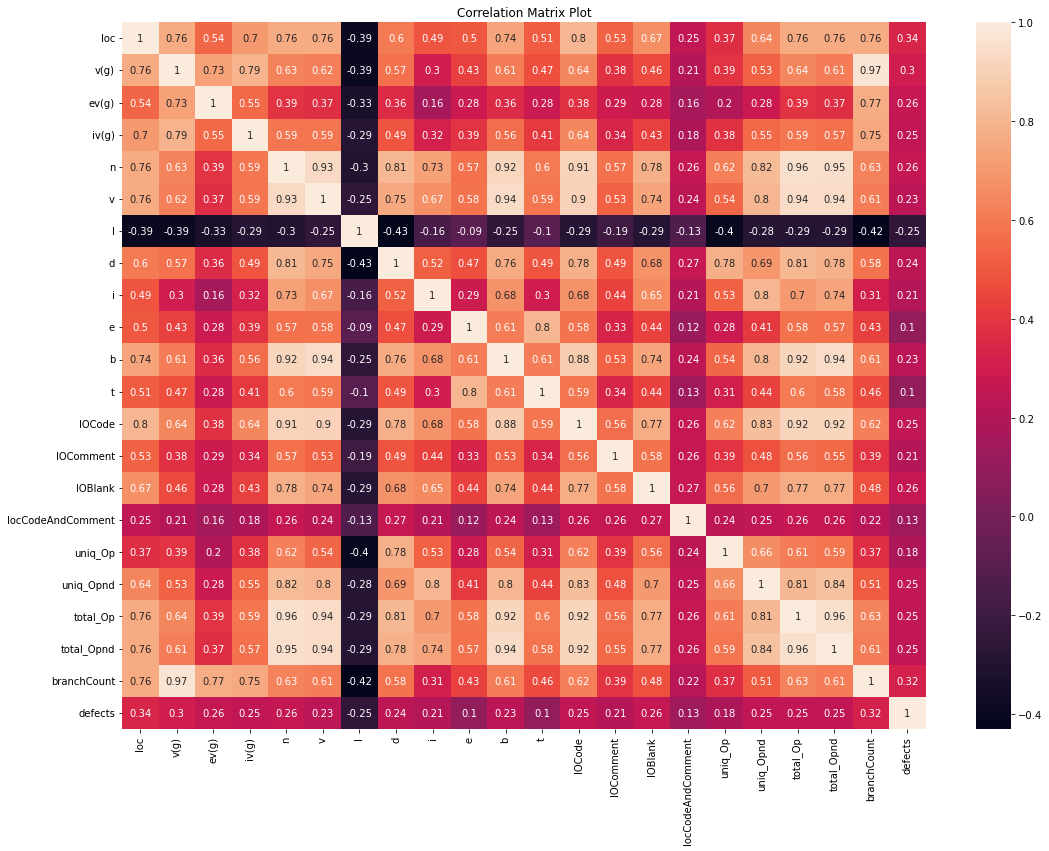

In [13]:
plt.figure(figsize=(18,13))

sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix Plot');

In [14]:
corr_mat.defects # or corr_mat['defects']

loc                  0.34
v(g)                 0.30
ev(g)                0.26
iv(g)                0.25
n                    0.26
v                    0.23
l                   -0.25
d                    0.24
i                    0.21
e                    0.10
b                    0.23
t                    0.10
lOCode               0.25
lOComment            0.21
lOBlank              0.26
locCodeAndComment    0.13
uniq_Op              0.18
uniq_Opnd            0.25
total_Op             0.25
total_Opnd           0.25
branchCount          0.32
defects              1.00
Name: defects, dtype: float64

In [15]:
#!pip install catboost

In [16]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve


X = df.drop('defects',axis=1)

y = df['defects']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Oversampling the minority class

In [17]:
train_data = pd.concat([X_train,y_train],axis=1)
train_data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
41510,34.0,8.0,1.0,6.0,142.0,734.13,0.04,23.20,31.64,17031.80,...,23,1,11,0,18.0,16.0,84.0,58.0,15.0,0
24079,21.0,3.0,1.0,2.0,40.0,180.94,0.07,13.93,14.87,2374.87,...,16,0,2,0,13.0,7.0,25.0,15.0,5.0,0
91367,7.0,1.0,1.0,1.0,15.0,49.83,0.29,3.50,14.24,174.40,...,4,0,1,0,5.0,5.0,8.0,7.0,1.0,1
6237,10.0,2.0,1.0,2.0,25.0,95.18,0.19,5.33,17.85,609.18,...,7,0,1,0,8.0,6.0,16.0,9.0,3.0,0
72207,17.0,3.0,1.0,2.0,36.0,152.21,0.12,8.44,20.19,1468.79,...,12,1,2,0,9.0,9.0,21.0,15.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58.0,8.0,3.0,7.0,163.0,915.93,0.04,26.21,32.61,19750.95,...,41,3,4,7,18.0,21.0,105.0,64.0,15.0,0
54886,61.0,8.0,5.0,6.0,157.0,806.51,0.05,18.38,44.35,13488.42,...,41,8,12,0,17.0,24.0,88.0,69.0,15.0,0
76820,16.0,4.0,3.0,1.0,25.0,116.76,0.13,9.17,13.11,899.24,...,11,0,3,0,11.0,6.0,15.0,10.0,7.0,0
860,17.0,2.0,1.0,2.0,36.0,165.06,0.17,5.85,28.52,902.99,...,14,0,1,0,9.0,13.0,22.0,14.0,3.0,0


In [18]:
class_count_0=len(train_data[train_data['defects']==0])
class_count_1=len(train_data[train_data['defects']==1])

In [19]:
class_count_0,class_count_1

(62874, 18536)

In [20]:
train_data_class_0 = train_data[train_data['defects']==0]
train_data_class_1 = train_data[train_data['defects']==1]

In [21]:
train_data_class_1_oversample=train_data_class_1.sample(class_count_0,replace=True)
train_data_class_1_oversample.shape

(62874, 22)

In [22]:
# concatinating 

train_oversample=pd.concat([train_data_class_0,train_data_class_1_oversample],axis=0)

In [23]:
len(train_oversample[train_oversample['defects']==0]),len(train_oversample[train_oversample['defects']==1])

(62874, 62874)

## Modelling

### Catboost

In [24]:
%%time

from sklearn.model_selection import GridSearchCV

param_grid = {
              'depth' : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100]
}

model = CatBoostClassifier()

X_train = train_oversample.drop('defects',axis=1)
y_train = train_oversample['defects']

cat_grid = GridSearchCV(estimator=model,
                        param_grid=param_grid,
                        cv=5,
                        verbose=5)

cat_grid.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.6901829	total: 175ms	remaining: 5.08s
1:	learn: 0.6873796	total: 188ms	remaining: 2.63s
2:	learn: 0.6846163	total: 200ms	remaining: 1.8s
3:	learn: 0.6818594	total: 212ms	remaining: 1.38s
4:	learn: 0.6791859	total: 224ms	remaining: 1.12s
5:	learn: 0.6765289	total: 237ms	remaining: 948ms
6:	learn: 0.6739885	total: 249ms	remaining: 817ms
7:	learn: 0.6715429	total: 260ms	remaining: 715ms
8:	learn: 0.6690604	total: 270ms	remaining: 631ms
9:	learn: 0.6666937	total: 281ms	remaining: 562ms
10:	learn: 0.6643372	total: 291ms	remaining: 503ms
11:	learn: 0.6621081	total: 301ms	remaining: 451ms
12:	learn: 0.6598887	total: 310ms	remaining: 405ms
13:	learn: 0.6576501	total: 319ms	remaining: 365ms
14:	learn: 0.6556051	total: 329ms	remaining: 329ms
15:	learn: 0.6535461	total: 339ms	remaining: 297ms
16:	learn: 0.6515179	total: 349ms	remaining: 267ms
17:	learn: 0.6495557	total: 359ms	remaining: 239ms
18:	learn: 0.6475417	total: 369

17:	learn: 0.5745748	total: 215ms	remaining: 143ms
18:	learn: 0.5723102	total: 227ms	remaining: 131ms
19:	learn: 0.5704030	total: 238ms	remaining: 119ms
20:	learn: 0.5686284	total: 248ms	remaining: 106ms
21:	learn: 0.5670853	total: 258ms	remaining: 93.7ms
22:	learn: 0.5657298	total: 268ms	remaining: 81.4ms
23:	learn: 0.5644414	total: 278ms	remaining: 69.5ms
24:	learn: 0.5631305	total: 289ms	remaining: 57.8ms
25:	learn: 0.5618925	total: 299ms	remaining: 46ms
26:	learn: 0.5608184	total: 310ms	remaining: 34.4ms
27:	learn: 0.5599046	total: 320ms	remaining: 22.8ms
28:	learn: 0.5590746	total: 330ms	remaining: 11.4ms
29:	learn: 0.5583340	total: 340ms	remaining: 0us
[CV 1/5] END depth=6, iterations=30, learning_rate=0.05;, score=0.726 total time=   0.3s
0:	learn: 0.6787911	total: 14.5ms	remaining: 421ms
1:	learn: 0.6663236	total: 28.2ms	remaining: 394ms
2:	learn: 0.6548732	total: 41.8ms	remaining: 376ms
3:	learn: 0.6446019	total: 54.4ms	remaining: 353ms
4:	learn: 0.6358788	total: 66.9ms	remain

23:	learn: 0.5513806	total: 303ms	remaining: 75.7ms
24:	learn: 0.5509800	total: 316ms	remaining: 63.2ms
25:	learn: 0.5504575	total: 329ms	remaining: 50.5ms
26:	learn: 0.5501556	total: 341ms	remaining: 37.9ms
27:	learn: 0.5498949	total: 353ms	remaining: 25.2ms
28:	learn: 0.5496611	total: 365ms	remaining: 12.6ms
29:	learn: 0.5493788	total: 379ms	remaining: 0us
[CV 1/5] END depth=6, iterations=30, learning_rate=0.1;, score=0.727 total time=   0.4s
0:	learn: 0.6653040	total: 13.3ms	remaining: 386ms
1:	learn: 0.6437838	total: 25.1ms	remaining: 351ms
2:	learn: 0.6265000	total: 38.6ms	remaining: 348ms
3:	learn: 0.6131641	total: 52.8ms	remaining: 343ms
4:	learn: 0.6023180	total: 66.6ms	remaining: 333ms
5:	learn: 0.5928059	total: 79.6ms	remaining: 318ms
6:	learn: 0.5857129	total: 93.2ms	remaining: 306ms
7:	learn: 0.5796056	total: 106ms	remaining: 291ms
8:	learn: 0.5747691	total: 118ms	remaining: 276ms
9:	learn: 0.5708727	total: 131ms	remaining: 262ms
10:	learn: 0.5675884	total: 144ms	remaining:

41:	learn: 0.6121979	total: 501ms	remaining: 95.4ms
42:	learn: 0.6109637	total: 513ms	remaining: 83.6ms
43:	learn: 0.6098398	total: 525ms	remaining: 71.6ms
44:	learn: 0.6087184	total: 539ms	remaining: 59.9ms
45:	learn: 0.6076477	total: 554ms	remaining: 48.1ms
46:	learn: 0.6065948	total: 568ms	remaining: 36.3ms
47:	learn: 0.6055553	total: 586ms	remaining: 24.4ms
48:	learn: 0.6044641	total: 614ms	remaining: 12.5ms
49:	learn: 0.6034100	total: 627ms	remaining: 0us
[CV 1/5] END depth=6, iterations=50, learning_rate=0.01;, score=0.724 total time=   0.6s
0:	learn: 0.6902014	total: 15.1ms	remaining: 742ms
1:	learn: 0.6874240	total: 29.1ms	remaining: 699ms
2:	learn: 0.6846680	total: 40.6ms	remaining: 637ms
3:	learn: 0.6819326	total: 52ms	remaining: 598ms
4:	learn: 0.6792791	total: 63.6ms	remaining: 572ms
5:	learn: 0.6766453	total: 75.5ms	remaining: 554ms
6:	learn: 0.6741137	total: 87.1ms	remaining: 535ms
7:	learn: 0.6716844	total: 99.6ms	remaining: 523ms
8:	learn: 0.6692972	total: 111ms	remaini

1:	learn: 0.6873932	total: 27.8ms	remaining: 667ms
2:	learn: 0.6846927	total: 40ms	remaining: 626ms
3:	learn: 0.6819615	total: 51.1ms	remaining: 587ms
4:	learn: 0.6793563	total: 61.9ms	remaining: 557ms
5:	learn: 0.6767294	total: 73.2ms	remaining: 537ms
6:	learn: 0.6741808	total: 84.8ms	remaining: 521ms
7:	learn: 0.6716527	total: 96.5ms	remaining: 506ms
8:	learn: 0.6692308	total: 108ms	remaining: 491ms
9:	learn: 0.6668544	total: 120ms	remaining: 478ms
10:	learn: 0.6644979	total: 133ms	remaining: 471ms
11:	learn: 0.6622597	total: 149ms	remaining: 473ms
12:	learn: 0.6600341	total: 162ms	remaining: 462ms
13:	learn: 0.6578095	total: 174ms	remaining: 447ms
14:	learn: 0.6557505	total: 185ms	remaining: 433ms
15:	learn: 0.6536859	total: 197ms	remaining: 418ms
16:	learn: 0.6516682	total: 207ms	remaining: 403ms
17:	learn: 0.6497039	total: 218ms	remaining: 388ms
18:	learn: 0.6476989	total: 230ms	remaining: 376ms
19:	learn: 0.6457848	total: 242ms	remaining: 363ms
20:	learn: 0.6439279	total: 253ms	r

10:	learn: 0.5968087	total: 144ms	remaining: 511ms
11:	learn: 0.5927381	total: 158ms	remaining: 500ms
12:	learn: 0.5888107	total: 171ms	remaining: 488ms
13:	learn: 0.5851616	total: 185ms	remaining: 475ms
14:	learn: 0.5821327	total: 200ms	remaining: 466ms
15:	learn: 0.5793027	total: 214ms	remaining: 455ms
16:	learn: 0.5766302	total: 228ms	remaining: 442ms
17:	learn: 0.5742237	total: 241ms	remaining: 429ms
18:	learn: 0.5719594	total: 254ms	remaining: 414ms
19:	learn: 0.5700124	total: 267ms	remaining: 401ms
20:	learn: 0.5682595	total: 281ms	remaining: 388ms
21:	learn: 0.5667200	total: 293ms	remaining: 373ms
22:	learn: 0.5653945	total: 306ms	remaining: 359ms
23:	learn: 0.5640821	total: 319ms	remaining: 345ms
24:	learn: 0.5628957	total: 332ms	remaining: 332ms
25:	learn: 0.5617635	total: 347ms	remaining: 320ms
26:	learn: 0.5605576	total: 360ms	remaining: 307ms
27:	learn: 0.5596246	total: 373ms	remaining: 293ms
28:	learn: 0.5587842	total: 386ms	remaining: 280ms
29:	learn: 0.5580244	total: 399

16:	learn: 0.5559111	total: 206ms	remaining: 400ms
17:	learn: 0.5551211	total: 219ms	remaining: 389ms
18:	learn: 0.5543089	total: 230ms	remaining: 375ms
19:	learn: 0.5535291	total: 240ms	remaining: 360ms
20:	learn: 0.5528577	total: 251ms	remaining: 347ms
21:	learn: 0.5522878	total: 262ms	remaining: 334ms
22:	learn: 0.5517612	total: 273ms	remaining: 320ms
23:	learn: 0.5513806	total: 284ms	remaining: 307ms
24:	learn: 0.5509800	total: 295ms	remaining: 295ms
25:	learn: 0.5504575	total: 306ms	remaining: 283ms
26:	learn: 0.5501556	total: 317ms	remaining: 270ms
27:	learn: 0.5498949	total: 327ms	remaining: 257ms
28:	learn: 0.5496611	total: 338ms	remaining: 245ms
29:	learn: 0.5493788	total: 349ms	remaining: 232ms
30:	learn: 0.5490994	total: 360ms	remaining: 220ms
31:	learn: 0.5488176	total: 370ms	remaining: 208ms
32:	learn: 0.5486052	total: 382ms	remaining: 197ms
33:	learn: 0.5483657	total: 395ms	remaining: 186ms
34:	learn: 0.5481012	total: 407ms	remaining: 174ms
35:	learn: 0.5479342	total: 419

27:	learn: 0.5498579	total: 410ms	remaining: 322ms
28:	learn: 0.5496172	total: 426ms	remaining: 308ms
29:	learn: 0.5493840	total: 439ms	remaining: 293ms
30:	learn: 0.5491719	total: 452ms	remaining: 277ms
31:	learn: 0.5488930	total: 465ms	remaining: 262ms
32:	learn: 0.5486316	total: 480ms	remaining: 247ms
33:	learn: 0.5483324	total: 494ms	remaining: 232ms
34:	learn: 0.5480709	total: 507ms	remaining: 217ms
35:	learn: 0.5479146	total: 520ms	remaining: 202ms
36:	learn: 0.5476790	total: 534ms	remaining: 188ms
37:	learn: 0.5475417	total: 548ms	remaining: 173ms
38:	learn: 0.5472739	total: 563ms	remaining: 159ms
39:	learn: 0.5471122	total: 577ms	remaining: 144ms
40:	learn: 0.5469822	total: 588ms	remaining: 129ms
41:	learn: 0.5468335	total: 600ms	remaining: 114ms
42:	learn: 0.5467339	total: 614ms	remaining: 100ms
43:	learn: 0.5465486	total: 628ms	remaining: 85.6ms
44:	learn: 0.5464070	total: 641ms	remaining: 71.2ms
45:	learn: 0.5462569	total: 654ms	remaining: 56.9ms
46:	learn: 0.5461524	total: 

86:	learn: 0.5769178	total: 1.11s	remaining: 166ms
87:	learn: 0.5764580	total: 1.13s	remaining: 154ms
88:	learn: 0.5759913	total: 1.14s	remaining: 141ms
89:	learn: 0.5755445	total: 1.15s	remaining: 128ms
90:	learn: 0.5751160	total: 1.17s	remaining: 115ms
91:	learn: 0.5746533	total: 1.18s	remaining: 103ms
92:	learn: 0.5742349	total: 1.19s	remaining: 89.9ms
93:	learn: 0.5738336	total: 1.21s	remaining: 77.3ms
94:	learn: 0.5734049	total: 1.23s	remaining: 64.6ms
95:	learn: 0.5729995	total: 1.24s	remaining: 51.8ms
96:	learn: 0.5726178	total: 1.25s	remaining: 38.8ms
97:	learn: 0.5722220	total: 1.27s	remaining: 25.9ms
98:	learn: 0.5718439	total: 1.28s	remaining: 13ms
99:	learn: 0.5714749	total: 1.3s	remaining: 0us
[CV 1/5] END depth=6, iterations=100, learning_rate=0.01;, score=0.725 total time=   1.3s
0:	learn: 0.6902014	total: 16.5ms	remaining: 1.63s
1:	learn: 0.6874240	total: 31.1ms	remaining: 1.52s
2:	learn: 0.6846680	total: 42.2ms	remaining: 1.36s
3:	learn: 0.6819326	total: 54.1ms	remaini

45:	learn: 0.6072281	total: 639ms	remaining: 750ms
46:	learn: 0.6061697	total: 652ms	remaining: 736ms
47:	learn: 0.6051280	total: 664ms	remaining: 719ms
48:	learn: 0.6041007	total: 676ms	remaining: 703ms
49:	learn: 0.6030416	total: 688ms	remaining: 688ms
50:	learn: 0.6020025	total: 699ms	remaining: 671ms
51:	learn: 0.6010415	total: 710ms	remaining: 656ms
52:	learn: 0.5999998	total: 722ms	remaining: 640ms
53:	learn: 0.5990933	total: 732ms	remaining: 624ms
54:	learn: 0.5981286	total: 744ms	remaining: 608ms
55:	learn: 0.5971941	total: 755ms	remaining: 593ms
56:	learn: 0.5963184	total: 765ms	remaining: 577ms
57:	learn: 0.5954256	total: 776ms	remaining: 562ms
58:	learn: 0.5945369	total: 787ms	remaining: 547ms
59:	learn: 0.5937107	total: 797ms	remaining: 532ms
60:	learn: 0.5928914	total: 810ms	remaining: 518ms
61:	learn: 0.5920695	total: 822ms	remaining: 504ms
62:	learn: 0.5912953	total: 835ms	remaining: 490ms
63:	learn: 0.5905159	total: 848ms	remaining: 477ms
64:	learn: 0.5897459	total: 860

14:	learn: 0.6557505	total: 212ms	remaining: 1.2s
15:	learn: 0.6536859	total: 225ms	remaining: 1.18s
16:	learn: 0.6516682	total: 239ms	remaining: 1.17s
17:	learn: 0.6497039	total: 252ms	remaining: 1.15s
18:	learn: 0.6476989	total: 265ms	remaining: 1.13s
19:	learn: 0.6457848	total: 279ms	remaining: 1.11s
20:	learn: 0.6439279	total: 292ms	remaining: 1.1s
21:	learn: 0.6421105	total: 305ms	remaining: 1.08s
22:	learn: 0.6403373	total: 318ms	remaining: 1.06s
23:	learn: 0.6386050	total: 332ms	remaining: 1.05s
24:	learn: 0.6368870	total: 345ms	remaining: 1.03s
25:	learn: 0.6352196	total: 358ms	remaining: 1.02s
26:	learn: 0.6335521	total: 371ms	remaining: 1s
27:	learn: 0.6319424	total: 384ms	remaining: 987ms
28:	learn: 0.6304042	total: 396ms	remaining: 971ms
29:	learn: 0.6288815	total: 410ms	remaining: 957ms
30:	learn: 0.6273243	total: 424ms	remaining: 944ms
31:	learn: 0.6258603	total: 438ms	remaining: 931ms
32:	learn: 0.6243629	total: 451ms	remaining: 916ms
33:	learn: 0.6229108	total: 466ms	re

86:	learn: 0.5463446	total: 1.04s	remaining: 156ms
87:	learn: 0.5462650	total: 1.06s	remaining: 144ms
88:	learn: 0.5462141	total: 1.07s	remaining: 132ms
89:	learn: 0.5461493	total: 1.08s	remaining: 120ms
90:	learn: 0.5460281	total: 1.09s	remaining: 108ms
91:	learn: 0.5459394	total: 1.1s	remaining: 95.7ms
92:	learn: 0.5458297	total: 1.11s	remaining: 83.6ms
93:	learn: 0.5457637	total: 1.12s	remaining: 71.6ms
94:	learn: 0.5457081	total: 1.13s	remaining: 59.6ms
95:	learn: 0.5456252	total: 1.14s	remaining: 47.6ms
96:	learn: 0.5454560	total: 1.15s	remaining: 35.7ms
97:	learn: 0.5453974	total: 1.16s	remaining: 23.8ms
98:	learn: 0.5453497	total: 1.17s	remaining: 11.9ms
99:	learn: 0.5452316	total: 1.19s	remaining: 0us
[CV 1/5] END depth=6, iterations=100, learning_rate=0.05;, score=0.728 total time=   1.2s
0:	learn: 0.6787911	total: 16.1ms	remaining: 1.59s
1:	learn: 0.6663236	total: 29.4ms	remaining: 1.44s
2:	learn: 0.6548732	total: 41.2ms	remaining: 1.33s
3:	learn: 0.6446019	total: 52.3ms	rema

50:	learn: 0.5499405	total: 818ms	remaining: 786ms
51:	learn: 0.5497210	total: 833ms	remaining: 769ms
52:	learn: 0.5495264	total: 848ms	remaining: 752ms
53:	learn: 0.5494223	total: 864ms	remaining: 736ms
54:	learn: 0.5493011	total: 879ms	remaining: 719ms
55:	learn: 0.5492020	total: 894ms	remaining: 702ms
56:	learn: 0.5490514	total: 909ms	remaining: 686ms
57:	learn: 0.5488998	total: 925ms	remaining: 670ms
58:	learn: 0.5487673	total: 943ms	remaining: 655ms
59:	learn: 0.5486440	total: 962ms	remaining: 642ms
60:	learn: 0.5485269	total: 982ms	remaining: 628ms
61:	learn: 0.5483656	total: 1s	remaining: 614ms
62:	learn: 0.5482705	total: 1.02s	remaining: 599ms
63:	learn: 0.5481147	total: 1.04s	remaining: 584ms
64:	learn: 0.5480211	total: 1.06s	remaining: 569ms
65:	learn: 0.5479335	total: 1.07s	remaining: 554ms
66:	learn: 0.5477674	total: 1.09s	remaining: 538ms
67:	learn: 0.5476345	total: 1.11s	remaining: 523ms
68:	learn: 0.5475201	total: 1.13s	remaining: 507ms
69:	learn: 0.5474074	total: 1.14s	

15:	learn: 0.5798696	total: 221ms	remaining: 1.16s
16:	learn: 0.5772148	total: 235ms	remaining: 1.15s
17:	learn: 0.5748179	total: 250ms	remaining: 1.14s
18:	learn: 0.5726955	total: 264ms	remaining: 1.12s
19:	learn: 0.5708113	total: 278ms	remaining: 1.11s
20:	learn: 0.5689963	total: 291ms	remaining: 1.09s
21:	learn: 0.5674248	total: 304ms	remaining: 1.08s
22:	learn: 0.5660295	total: 318ms	remaining: 1.06s
23:	learn: 0.5647508	total: 332ms	remaining: 1.05s
24:	learn: 0.5635584	total: 345ms	remaining: 1.03s
25:	learn: 0.5624465	total: 358ms	remaining: 1.02s
26:	learn: 0.5613697	total: 370ms	remaining: 1s
27:	learn: 0.5604264	total: 382ms	remaining: 983ms
28:	learn: 0.5595872	total: 394ms	remaining: 965ms
29:	learn: 0.5587955	total: 406ms	remaining: 948ms
30:	learn: 0.5581258	total: 419ms	remaining: 932ms
31:	learn: 0.5573176	total: 431ms	remaining: 916ms
32:	learn: 0.5567431	total: 443ms	remaining: 900ms
33:	learn: 0.5562303	total: 456ms	remaining: 884ms
34:	learn: 0.5555827	total: 468ms	

76:	learn: 0.5424762	total: 1.08s	remaining: 323ms
77:	learn: 0.5424198	total: 1.1s	remaining: 309ms
78:	learn: 0.5423636	total: 1.11s	remaining: 295ms
79:	learn: 0.5421840	total: 1.12s	remaining: 281ms
80:	learn: 0.5420884	total: 1.13s	remaining: 266ms
81:	learn: 0.5419677	total: 1.15s	remaining: 252ms
82:	learn: 0.5418989	total: 1.16s	remaining: 238ms
83:	learn: 0.5418529	total: 1.17s	remaining: 223ms
84:	learn: 0.5417545	total: 1.19s	remaining: 209ms
85:	learn: 0.5416304	total: 1.2s	remaining: 195ms
86:	learn: 0.5415946	total: 1.21s	remaining: 181ms
87:	learn: 0.5414562	total: 1.22s	remaining: 167ms
88:	learn: 0.5413624	total: 1.24s	remaining: 153ms
89:	learn: 0.5413316	total: 1.25s	remaining: 139ms
90:	learn: 0.5411853	total: 1.26s	remaining: 125ms
91:	learn: 0.5411111	total: 1.28s	remaining: 111ms
92:	learn: 0.5409628	total: 1.29s	remaining: 97.2ms
93:	learn: 0.5408422	total: 1.3s	remaining: 83.2ms
94:	learn: 0.5408076	total: 1.31s	remaining: 69.2ms
95:	learn: 0.5407051	total: 1.3

48:	learn: 0.5446920	total: 652ms	remaining: 679ms
49:	learn: 0.5445380	total: 667ms	remaining: 667ms
50:	learn: 0.5444388	total: 680ms	remaining: 653ms
51:	learn: 0.5442614	total: 691ms	remaining: 638ms
52:	learn: 0.5442115	total: 704ms	remaining: 624ms
53:	learn: 0.5440967	total: 717ms	remaining: 611ms
54:	learn: 0.5437866	total: 728ms	remaining: 596ms
55:	learn: 0.5437356	total: 739ms	remaining: 581ms
56:	learn: 0.5435710	total: 753ms	remaining: 568ms
57:	learn: 0.5435286	total: 765ms	remaining: 554ms
58:	learn: 0.5433284	total: 778ms	remaining: 540ms
59:	learn: 0.5432412	total: 791ms	remaining: 527ms
60:	learn: 0.5431809	total: 803ms	remaining: 514ms
61:	learn: 0.5430454	total: 817ms	remaining: 500ms
62:	learn: 0.5427769	total: 828ms	remaining: 486ms
63:	learn: 0.5425511	total: 842ms	remaining: 474ms
64:	learn: 0.5423566	total: 858ms	remaining: 462ms
65:	learn: 0.5422966	total: 872ms	remaining: 449ms
66:	learn: 0.5420972	total: 885ms	remaining: 436ms
67:	learn: 0.5418985	total: 898

18:	learn: 0.5540901	total: 218ms	remaining: 927ms
19:	learn: 0.5533277	total: 229ms	remaining: 916ms
20:	learn: 0.5526204	total: 241ms	remaining: 907ms
21:	learn: 0.5518861	total: 252ms	remaining: 894ms
22:	learn: 0.5513957	total: 264ms	remaining: 883ms
23:	learn: 0.5509905	total: 275ms	remaining: 870ms
24:	learn: 0.5506056	total: 286ms	remaining: 859ms
25:	learn: 0.5502633	total: 297ms	remaining: 846ms
26:	learn: 0.5499508	total: 308ms	remaining: 834ms
27:	learn: 0.5497130	total: 319ms	remaining: 821ms
28:	learn: 0.5494788	total: 330ms	remaining: 808ms
29:	learn: 0.5491580	total: 341ms	remaining: 796ms
30:	learn: 0.5488827	total: 352ms	remaining: 784ms
31:	learn: 0.5486806	total: 363ms	remaining: 770ms
32:	learn: 0.5484985	total: 374ms	remaining: 759ms
33:	learn: 0.5483335	total: 384ms	remaining: 745ms
34:	learn: 0.5480970	total: 395ms	remaining: 733ms
35:	learn: 0.5478918	total: 406ms	remaining: 722ms
36:	learn: 0.5476653	total: 418ms	remaining: 712ms
37:	learn: 0.5474705	total: 429

19:	learn: 0.6447232	total: 317ms	remaining: 159ms
20:	learn: 0.6429072	total: 334ms	remaining: 143ms
21:	learn: 0.6410092	total: 350ms	remaining: 127ms
22:	learn: 0.6391372	total: 365ms	remaining: 111ms
23:	learn: 0.6373293	total: 379ms	remaining: 94.9ms
24:	learn: 0.6355565	total: 395ms	remaining: 79ms
25:	learn: 0.6337843	total: 410ms	remaining: 63.1ms
26:	learn: 0.6320431	total: 425ms	remaining: 47.3ms
27:	learn: 0.6303974	total: 440ms	remaining: 31.4ms
28:	learn: 0.6287329	total: 455ms	remaining: 15.7ms
29:	learn: 0.6271211	total: 470ms	remaining: 0us
[CV 3/5] END depth=8, iterations=30, learning_rate=0.01;, score=0.720 total time=   0.4s
0:	learn: 0.6901346	total: 20.2ms	remaining: 584ms
1:	learn: 0.6873736	total: 36.5ms	remaining: 510ms
2:	learn: 0.6845948	total: 51.3ms	remaining: 462ms
3:	learn: 0.6818837	total: 67.4ms	remaining: 438ms
4:	learn: 0.6791388	total: 83.7ms	remaining: 418ms
5:	learn: 0.6765490	total: 101ms	remaining: 402ms
6:	learn: 0.6740056	total: 118ms	remaining:

28:	learn: 0.5570107	total: 499ms	remaining: 17.2ms
29:	learn: 0.5561592	total: 515ms	remaining: 0us
[CV 3/5] END depth=8, iterations=30, learning_rate=0.05;, score=0.721 total time=   0.5s
0:	learn: 0.6784730	total: 19.5ms	remaining: 566ms
1:	learn: 0.6657929	total: 34.4ms	remaining: 482ms
2:	learn: 0.6544190	total: 48.3ms	remaining: 435ms
3:	learn: 0.6442917	total: 63.8ms	remaining: 415ms
4:	learn: 0.6349385	total: 80.2ms	remaining: 401ms
5:	learn: 0.6266789	total: 97.6ms	remaining: 390ms
6:	learn: 0.6191787	total: 114ms	remaining: 374ms
7:	learn: 0.6125538	total: 131ms	remaining: 360ms
8:	learn: 0.6065439	total: 147ms	remaining: 344ms
9:	learn: 0.6009590	total: 164ms	remaining: 327ms
10:	learn: 0.5961403	total: 180ms	remaining: 311ms
11:	learn: 0.5916441	total: 195ms	remaining: 293ms
12:	learn: 0.5878799	total: 210ms	remaining: 275ms
13:	learn: 0.5842674	total: 226ms	remaining: 258ms
14:	learn: 0.5810361	total: 241ms	remaining: 241ms
15:	learn: 0.5781751	total: 257ms	remaining: 225m

1:	learn: 0.6425871	total: 33.7ms	remaining: 472ms
2:	learn: 0.6256433	total: 48.3ms	remaining: 435ms
3:	learn: 0.6111485	total: 64.3ms	remaining: 418ms
4:	learn: 0.6000562	total: 80.8ms	remaining: 404ms
5:	learn: 0.5909089	total: 97.8ms	remaining: 391ms
6:	learn: 0.5837735	total: 114ms	remaining: 375ms
7:	learn: 0.5778274	total: 129ms	remaining: 354ms
8:	learn: 0.5727523	total: 144ms	remaining: 336ms
9:	learn: 0.5684226	total: 160ms	remaining: 320ms
10:	learn: 0.5650261	total: 176ms	remaining: 304ms
11:	learn: 0.5620161	total: 192ms	remaining: 287ms
12:	learn: 0.5600104	total: 207ms	remaining: 270ms
13:	learn: 0.5580600	total: 222ms	remaining: 254ms
14:	learn: 0.5565301	total: 238ms	remaining: 238ms
15:	learn: 0.5549830	total: 255ms	remaining: 223ms
16:	learn: 0.5540265	total: 270ms	remaining: 206ms
17:	learn: 0.5527911	total: 285ms	remaining: 190ms
18:	learn: 0.5519502	total: 301ms	remaining: 175ms
19:	learn: 0.5511342	total: 318ms	remaining: 159ms
20:	learn: 0.5504267	total: 335ms	r

47:	learn: 0.6045299	total: 760ms	remaining: 31.7ms
48:	learn: 0.6035327	total: 777ms	remaining: 15.9ms
49:	learn: 0.6025208	total: 793ms	remaining: 0us
[CV 2/5] END depth=8, iterations=50, learning_rate=0.01;, score=0.726 total time=   0.8s
0:	learn: 0.6901365	total: 17.6ms	remaining: 862ms
1:	learn: 0.6872630	total: 32.3ms	remaining: 776ms
2:	learn: 0.6844625	total: 47.2ms	remaining: 740ms
3:	learn: 0.6817601	total: 64.2ms	remaining: 739ms
4:	learn: 0.6790864	total: 81.2ms	remaining: 731ms
5:	learn: 0.6764061	total: 101ms	remaining: 740ms
6:	learn: 0.6738886	total: 120ms	remaining: 739ms
7:	learn: 0.6713175	total: 137ms	remaining: 720ms
8:	learn: 0.6688412	total: 154ms	remaining: 703ms
9:	learn: 0.6663601	total: 171ms	remaining: 685ms
10:	learn: 0.6640263	total: 188ms	remaining: 665ms
11:	learn: 0.6617225	total: 203ms	remaining: 644ms
12:	learn: 0.6594872	total: 218ms	remaining: 621ms
13:	learn: 0.6573154	total: 234ms	remaining: 601ms
14:	learn: 0.6551886	total: 248ms	remaining: 579m

5:	learn: 0.6264521	total: 97.1ms	remaining: 712ms
6:	learn: 0.6189932	total: 113ms	remaining: 695ms
7:	learn: 0.6123887	total: 129ms	remaining: 677ms
8:	learn: 0.6062898	total: 145ms	remaining: 661ms
9:	learn: 0.6007213	total: 163ms	remaining: 651ms
10:	learn: 0.5958616	total: 180ms	remaining: 637ms
11:	learn: 0.5913432	total: 195ms	remaining: 618ms
12:	learn: 0.5875787	total: 210ms	remaining: 598ms
13:	learn: 0.5841792	total: 225ms	remaining: 580ms
14:	learn: 0.5808404	total: 241ms	remaining: 562ms
15:	learn: 0.5780528	total: 257ms	remaining: 546ms
16:	learn: 0.5755057	total: 272ms	remaining: 528ms
17:	learn: 0.5729346	total: 288ms	remaining: 512ms
18:	learn: 0.5707355	total: 306ms	remaining: 499ms
19:	learn: 0.5685471	total: 322ms	remaining: 483ms
20:	learn: 0.5668851	total: 338ms	remaining: 467ms
21:	learn: 0.5652516	total: 354ms	remaining: 450ms
22:	learn: 0.5638434	total: 369ms	remaining: 434ms
23:	learn: 0.5626111	total: 385ms	remaining: 417ms
24:	learn: 0.5614082	total: 401ms	r

13:	learn: 0.5842674	total: 223ms	remaining: 573ms
14:	learn: 0.5810361	total: 240ms	remaining: 560ms
15:	learn: 0.5781751	total: 257ms	remaining: 546ms
16:	learn: 0.5756524	total: 274ms	remaining: 532ms
17:	learn: 0.5730698	total: 291ms	remaining: 517ms
18:	learn: 0.5708614	total: 307ms	remaining: 501ms
19:	learn: 0.5687469	total: 322ms	remaining: 484ms
20:	learn: 0.5669599	total: 339ms	remaining: 468ms
21:	learn: 0.5653436	total: 354ms	remaining: 450ms
22:	learn: 0.5638544	total: 370ms	remaining: 434ms
23:	learn: 0.5625996	total: 385ms	remaining: 417ms
24:	learn: 0.5613353	total: 401ms	remaining: 401ms
25:	learn: 0.5602002	total: 418ms	remaining: 386ms
26:	learn: 0.5591418	total: 435ms	remaining: 370ms
27:	learn: 0.5581280	total: 450ms	remaining: 354ms
28:	learn: 0.5572879	total: 465ms	remaining: 337ms
29:	learn: 0.5563745	total: 481ms	remaining: 321ms
30:	learn: 0.5556549	total: 497ms	remaining: 305ms
31:	learn: 0.5549431	total: 514ms	remaining: 289ms
32:	learn: 0.5542894	total: 529

31:	learn: 0.5466180	total: 522ms	remaining: 294ms
32:	learn: 0.5461289	total: 539ms	remaining: 278ms
33:	learn: 0.5458264	total: 556ms	remaining: 262ms
34:	learn: 0.5455610	total: 571ms	remaining: 245ms
35:	learn: 0.5452576	total: 587ms	remaining: 228ms
36:	learn: 0.5448363	total: 603ms	remaining: 212ms
37:	learn: 0.5445968	total: 618ms	remaining: 195ms
38:	learn: 0.5443849	total: 633ms	remaining: 179ms
39:	learn: 0.5442159	total: 649ms	remaining: 162ms
40:	learn: 0.5439533	total: 664ms	remaining: 146ms
41:	learn: 0.5435366	total: 681ms	remaining: 130ms
42:	learn: 0.5430823	total: 696ms	remaining: 113ms
43:	learn: 0.5424561	total: 712ms	remaining: 97.1ms
44:	learn: 0.5420598	total: 730ms	remaining: 81.1ms
45:	learn: 0.5416659	total: 746ms	remaining: 64.9ms
46:	learn: 0.5414130	total: 762ms	remaining: 48.6ms
47:	learn: 0.5411977	total: 778ms	remaining: 32.4ms
48:	learn: 0.5410302	total: 792ms	remaining: 16.2ms
49:	learn: 0.5409468	total: 806ms	remaining: 0us
[CV 2/5] END depth=8, itera

37:	learn: 0.5427339	total: 629ms	remaining: 198ms
38:	learn: 0.5425471	total: 645ms	remaining: 182ms
39:	learn: 0.5422087	total: 661ms	remaining: 165ms
40:	learn: 0.5418692	total: 677ms	remaining: 149ms
41:	learn: 0.5415747	total: 692ms	remaining: 132ms
42:	learn: 0.5414370	total: 708ms	remaining: 115ms
43:	learn: 0.5409071	total: 724ms	remaining: 98.7ms
44:	learn: 0.5405402	total: 739ms	remaining: 82.1ms
45:	learn: 0.5401330	total: 755ms	remaining: 65.7ms
46:	learn: 0.5397789	total: 771ms	remaining: 49.2ms
47:	learn: 0.5395760	total: 799ms	remaining: 33.3ms
48:	learn: 0.5393014	total: 817ms	remaining: 16.7ms
49:	learn: 0.5390960	total: 836ms	remaining: 0us
[CV 5/5] END depth=8, iterations=50, learning_rate=0.1;, score=0.731 total time=   0.8s
0:	learn: 0.6901547	total: 15.8ms	remaining: 1.57s
1:	learn: 0.6873171	total: 32.9ms	remaining: 1.61s
2:	learn: 0.6845297	total: 48.8ms	remaining: 1.58s
3:	learn: 0.6818136	total: 64.6ms	remaining: 1.55s
4:	learn: 0.6790613	total: 80.4ms	remaini

51:	learn: 0.6005689	total: 938ms	remaining: 866ms
52:	learn: 0.5995585	total: 957ms	remaining: 849ms
53:	learn: 0.5986095	total: 976ms	remaining: 832ms
54:	learn: 0.5976439	total: 995ms	remaining: 814ms
55:	learn: 0.5967397	total: 1.01s	remaining: 796ms
56:	learn: 0.5958152	total: 1.03s	remaining: 778ms
57:	learn: 0.5949811	total: 1.05s	remaining: 759ms
58:	learn: 0.5941092	total: 1.07s	remaining: 741ms
59:	learn: 0.5933126	total: 1.08s	remaining: 722ms
60:	learn: 0.5925118	total: 1.1s	remaining: 703ms
61:	learn: 0.5917186	total: 1.12s	remaining: 685ms
62:	learn: 0.5909473	total: 1.14s	remaining: 668ms
63:	learn: 0.5901769	total: 1.16s	remaining: 650ms
64:	learn: 0.5894092	total: 1.17s	remaining: 632ms
65:	learn: 0.5886763	total: 1.19s	remaining: 614ms
66:	learn: 0.5879951	total: 1.21s	remaining: 595ms
67:	learn: 0.5872579	total: 1.23s	remaining: 577ms
68:	learn: 0.5865512	total: 1.24s	remaining: 558ms
69:	learn: 0.5858331	total: 1.26s	remaining: 540ms
70:	learn: 0.5851416	total: 1.28

13:	learn: 0.6573773	total: 223ms	remaining: 1.37s
14:	learn: 0.6552694	total: 239ms	remaining: 1.36s
15:	learn: 0.6531243	total: 256ms	remaining: 1.34s
16:	learn: 0.6509837	total: 271ms	remaining: 1.32s
17:	learn: 0.6488558	total: 287ms	remaining: 1.31s
18:	learn: 0.6468358	total: 303ms	remaining: 1.29s
19:	learn: 0.6448282	total: 318ms	remaining: 1.27s
20:	learn: 0.6429725	total: 333ms	remaining: 1.25s
21:	learn: 0.6410709	total: 349ms	remaining: 1.24s
22:	learn: 0.6391980	total: 364ms	remaining: 1.22s
23:	learn: 0.6373942	total: 379ms	remaining: 1.2s
24:	learn: 0.6356221	total: 395ms	remaining: 1.18s
25:	learn: 0.6338890	total: 410ms	remaining: 1.17s
26:	learn: 0.6321881	total: 429ms	remaining: 1.16s
27:	learn: 0.6305570	total: 444ms	remaining: 1.14s
28:	learn: 0.6289046	total: 460ms	remaining: 1.13s
29:	learn: 0.6273126	total: 475ms	remaining: 1.11s
30:	learn: 0.6257638	total: 490ms	remaining: 1.09s
31:	learn: 0.6242276	total: 506ms	remaining: 1.07s
32:	learn: 0.6227680	total: 522m

76:	learn: 0.5805628	total: 1.24s	remaining: 371ms
77:	learn: 0.5799522	total: 1.26s	remaining: 355ms
78:	learn: 0.5793864	total: 1.27s	remaining: 339ms
79:	learn: 0.5787734	total: 1.29s	remaining: 323ms
80:	learn: 0.5782543	total: 1.3s	remaining: 305ms
81:	learn: 0.5776848	total: 1.32s	remaining: 289ms
82:	learn: 0.5771637	total: 1.33s	remaining: 273ms
83:	learn: 0.5766446	total: 1.35s	remaining: 257ms
84:	learn: 0.5761327	total: 1.36s	remaining: 241ms
85:	learn: 0.5756487	total: 1.38s	remaining: 225ms
86:	learn: 0.5751590	total: 1.4s	remaining: 209ms
87:	learn: 0.5746630	total: 1.41s	remaining: 193ms
88:	learn: 0.5741598	total: 1.43s	remaining: 177ms
89:	learn: 0.5736806	total: 1.45s	remaining: 161ms
90:	learn: 0.5732048	total: 1.46s	remaining: 145ms
91:	learn: 0.5727913	total: 1.48s	remaining: 128ms
92:	learn: 0.5723506	total: 1.49s	remaining: 112ms
93:	learn: 0.5719188	total: 1.51s	remaining: 96.4ms
94:	learn: 0.5715284	total: 1.52s	remaining: 80.3ms
95:	learn: 0.5710792	total: 1.5

43:	learn: 0.5506416	total: 745ms	remaining: 948ms
44:	learn: 0.5503310	total: 762ms	remaining: 932ms
45:	learn: 0.5500240	total: 778ms	remaining: 913ms
46:	learn: 0.5496766	total: 794ms	remaining: 896ms
47:	learn: 0.5493341	total: 810ms	remaining: 878ms
48:	learn: 0.5490485	total: 826ms	remaining: 859ms
49:	learn: 0.5488081	total: 842ms	remaining: 842ms
50:	learn: 0.5486177	total: 858ms	remaining: 824ms
51:	learn: 0.5483638	total: 874ms	remaining: 807ms
52:	learn: 0.5481133	total: 889ms	remaining: 788ms
53:	learn: 0.5479246	total: 904ms	remaining: 770ms
54:	learn: 0.5476810	total: 920ms	remaining: 753ms
55:	learn: 0.5474636	total: 938ms	remaining: 737ms
56:	learn: 0.5472434	total: 955ms	remaining: 720ms
57:	learn: 0.5469179	total: 971ms	remaining: 703ms
58:	learn: 0.5466530	total: 988ms	remaining: 686ms
59:	learn: 0.5464623	total: 1s	remaining: 669ms
60:	learn: 0.5462566	total: 1.02s	remaining: 652ms
61:	learn: 0.5460715	total: 1.03s	remaining: 634ms
62:	learn: 0.5458821	total: 1.05s	

11:	learn: 0.5916441	total: 218ms	remaining: 1.6s
12:	learn: 0.5878799	total: 236ms	remaining: 1.58s
13:	learn: 0.5842674	total: 254ms	remaining: 1.56s
14:	learn: 0.5810361	total: 272ms	remaining: 1.54s
15:	learn: 0.5781751	total: 289ms	remaining: 1.51s
16:	learn: 0.5756524	total: 304ms	remaining: 1.49s
17:	learn: 0.5730698	total: 321ms	remaining: 1.46s
18:	learn: 0.5708614	total: 339ms	remaining: 1.45s
19:	learn: 0.5687469	total: 357ms	remaining: 1.43s
20:	learn: 0.5669599	total: 375ms	remaining: 1.41s
21:	learn: 0.5653436	total: 392ms	remaining: 1.39s
22:	learn: 0.5638544	total: 408ms	remaining: 1.37s
23:	learn: 0.5625996	total: 426ms	remaining: 1.35s
24:	learn: 0.5613353	total: 442ms	remaining: 1.33s
25:	learn: 0.5602002	total: 458ms	remaining: 1.3s
26:	learn: 0.5591418	total: 474ms	remaining: 1.28s
27:	learn: 0.5581280	total: 491ms	remaining: 1.26s
28:	learn: 0.5572879	total: 507ms	remaining: 1.24s
29:	learn: 0.5563745	total: 523ms	remaining: 1.22s
30:	learn: 0.5556549	total: 540ms

82:	learn: 0.5415232	total: 1.34s	remaining: 274ms
83:	learn: 0.5414386	total: 1.35s	remaining: 258ms
84:	learn: 0.5412855	total: 1.37s	remaining: 242ms
85:	learn: 0.5411633	total: 1.39s	remaining: 226ms
86:	learn: 0.5409619	total: 1.4s	remaining: 210ms
87:	learn: 0.5407944	total: 1.42s	remaining: 194ms
88:	learn: 0.5406058	total: 1.43s	remaining: 177ms
89:	learn: 0.5403982	total: 1.45s	remaining: 161ms
90:	learn: 0.5402247	total: 1.47s	remaining: 145ms
91:	learn: 0.5399177	total: 1.48s	remaining: 129ms
92:	learn: 0.5397963	total: 1.5s	remaining: 113ms
93:	learn: 0.5397105	total: 1.51s	remaining: 96.6ms
94:	learn: 0.5396479	total: 1.53s	remaining: 80.4ms
95:	learn: 0.5395983	total: 1.54s	remaining: 64.4ms
96:	learn: 0.5393029	total: 1.56s	remaining: 48.3ms
97:	learn: 0.5392301	total: 1.58s	remaining: 32.2ms
98:	learn: 0.5391089	total: 1.59s	remaining: 16.1ms
99:	learn: 0.5389657	total: 1.62s	remaining: 0us
[CV 5/5] END depth=8, iterations=100, learning_rate=0.05;, score=0.730 total tim

52:	learn: 0.5401634	total: 834ms	remaining: 740ms
53:	learn: 0.5399520	total: 850ms	remaining: 724ms
54:	learn: 0.5396709	total: 867ms	remaining: 710ms
55:	learn: 0.5391878	total: 882ms	remaining: 693ms
56:	learn: 0.5390978	total: 897ms	remaining: 677ms
57:	learn: 0.5387160	total: 913ms	remaining: 661ms
58:	learn: 0.5386279	total: 927ms	remaining: 644ms
59:	learn: 0.5383741	total: 942ms	remaining: 628ms
60:	learn: 0.5382641	total: 955ms	remaining: 611ms
61:	learn: 0.5379268	total: 972ms	remaining: 596ms
62:	learn: 0.5376538	total: 988ms	remaining: 580ms
63:	learn: 0.5375841	total: 1s	remaining: 564ms
64:	learn: 0.5374049	total: 1.02s	remaining: 548ms
65:	learn: 0.5371488	total: 1.03s	remaining: 532ms
66:	learn: 0.5369592	total: 1.05s	remaining: 517ms
67:	learn: 0.5365725	total: 1.06s	remaining: 502ms
68:	learn: 0.5364310	total: 1.08s	remaining: 485ms
69:	learn: 0.5362496	total: 1.09s	remaining: 470ms
70:	learn: 0.5359801	total: 1.11s	remaining: 454ms
71:	learn: 0.5357040	total: 1.13s	

10:	learn: 0.5650261	total: 224ms	remaining: 1.81s
11:	learn: 0.5620161	total: 244ms	remaining: 1.78s
12:	learn: 0.5600104	total: 262ms	remaining: 1.75s
13:	learn: 0.5580600	total: 281ms	remaining: 1.72s
14:	learn: 0.5565301	total: 300ms	remaining: 1.7s
15:	learn: 0.5549830	total: 321ms	remaining: 1.69s
16:	learn: 0.5540265	total: 340ms	remaining: 1.66s
17:	learn: 0.5527911	total: 359ms	remaining: 1.63s
18:	learn: 0.5519502	total: 381ms	remaining: 1.62s
19:	learn: 0.5511342	total: 400ms	remaining: 1.6s
20:	learn: 0.5504267	total: 420ms	remaining: 1.58s
21:	learn: 0.5498334	total: 440ms	remaining: 1.56s
22:	learn: 0.5493735	total: 461ms	remaining: 1.54s
23:	learn: 0.5490015	total: 479ms	remaining: 1.52s
24:	learn: 0.5484792	total: 498ms	remaining: 1.49s
25:	learn: 0.5480701	total: 517ms	remaining: 1.47s
26:	learn: 0.5473855	total: 536ms	remaining: 1.45s
27:	learn: 0.5470014	total: 554ms	remaining: 1.43s
28:	learn: 0.5464901	total: 573ms	remaining: 1.4s
29:	learn: 0.5460228	total: 589ms	

79:	learn: 0.5320528	total: 1.47s	remaining: 369ms
80:	learn: 0.5316068	total: 1.5s	remaining: 351ms
81:	learn: 0.5314569	total: 1.52s	remaining: 334ms
82:	learn: 0.5314208	total: 1.55s	remaining: 317ms
83:	learn: 0.5311829	total: 1.57s	remaining: 299ms
84:	learn: 0.5310518	total: 1.59s	remaining: 281ms
85:	learn: 0.5309048	total: 1.62s	remaining: 263ms
86:	learn: 0.5306455	total: 1.64s	remaining: 245ms
87:	learn: 0.5304148	total: 1.66s	remaining: 226ms
88:	learn: 0.5301238	total: 1.68s	remaining: 207ms
89:	learn: 0.5297454	total: 1.7s	remaining: 189ms
90:	learn: 0.5294411	total: 1.72s	remaining: 170ms
91:	learn: 0.5291837	total: 1.74s	remaining: 151ms
92:	learn: 0.5291090	total: 1.75s	remaining: 132ms
93:	learn: 0.5286889	total: 1.77s	remaining: 113ms
94:	learn: 0.5286328	total: 1.78s	remaining: 93.9ms
95:	learn: 0.5285480	total: 1.8s	remaining: 75ms
96:	learn: 0.5283629	total: 1.81s	remaining: 56.2ms
97:	learn: 0.5282484	total: 1.83s	remaining: 37.4ms
98:	learn: 0.5280828	total: 1.85

17:	learn: 0.6480955	total: 773ms	remaining: 516ms
18:	learn: 0.6459941	total: 817ms	remaining: 473ms
19:	learn: 0.6439942	total: 858ms	remaining: 429ms
20:	learn: 0.6420922	total: 897ms	remaining: 384ms
21:	learn: 0.6401683	total: 934ms	remaining: 340ms
22:	learn: 0.6383652	total: 979ms	remaining: 298ms
23:	learn: 0.6365136	total: 1.02s	remaining: 254ms
24:	learn: 0.6346848	total: 1.06s	remaining: 212ms
25:	learn: 0.6329209	total: 1.1s	remaining: 170ms
26:	learn: 0.6311732	total: 1.15s	remaining: 127ms
27:	learn: 0.6294211	total: 1.19s	remaining: 85ms
28:	learn: 0.6278429	total: 1.23s	remaining: 42.6ms
29:	learn: 0.6262257	total: 1.27s	remaining: 0us
[CV 5/5] END depth=10, iterations=30, learning_rate=0.01;, score=0.725 total time=   1.3s
0:	learn: 0.6784428	total: 37.4ms	remaining: 1.08s
1:	learn: 0.6655920	total: 77.8ms	remaining: 1.09s
2:	learn: 0.6536505	total: 114ms	remaining: 1.03s
3:	learn: 0.6432038	total: 154ms	remaining: 1s
4:	learn: 0.6334365	total: 195ms	remaining: 977ms
5

22:	learn: 0.5619336	total: 995ms	remaining: 303ms
23:	learn: 0.5605733	total: 1.03s	remaining: 258ms
24:	learn: 0.5591584	total: 1.08s	remaining: 216ms
25:	learn: 0.5579283	total: 1.12s	remaining: 173ms
26:	learn: 0.5567394	total: 1.16s	remaining: 129ms
27:	learn: 0.5556081	total: 1.2s	remaining: 85.6ms
28:	learn: 0.5547465	total: 1.24s	remaining: 42.8ms
29:	learn: 0.5538912	total: 1.28s	remaining: 0us
[CV 5/5] END depth=10, iterations=30, learning_rate=0.05;, score=0.728 total time=   1.3s
0:	learn: 0.6646483	total: 40ms	remaining: 1.16s
1:	learn: 0.6427041	total: 78.4ms	remaining: 1.1s
2:	learn: 0.6241377	total: 118ms	remaining: 1.06s
3:	learn: 0.6111385	total: 131ms	remaining: 851ms
4:	learn: 0.5995842	total: 170ms	remaining: 848ms
5:	learn: 0.5898019	total: 209ms	remaining: 837ms
6:	learn: 0.5817301	total: 248ms	remaining: 813ms
7:	learn: 0.5751377	total: 289ms	remaining: 794ms
8:	learn: 0.5694945	total: 328ms	remaining: 766ms
9:	learn: 0.5654225	total: 365ms	remaining: 731ms
10:	

26:	learn: 0.5411532	total: 1.22s	remaining: 135ms
27:	learn: 0.5401665	total: 1.26s	remaining: 90ms
28:	learn: 0.5394658	total: 1.3s	remaining: 44.8ms
29:	learn: 0.5390413	total: 1.34s	remaining: 0us
[CV 5/5] END depth=10, iterations=30, learning_rate=0.1;, score=0.732 total time=   1.3s
0:	learn: 0.6901386	total: 44.1ms	remaining: 2.16s
1:	learn: 0.6872605	total: 84.1ms	remaining: 2.02s
2:	learn: 0.6844572	total: 125ms	remaining: 1.96s
3:	learn: 0.6816496	total: 165ms	remaining: 1.9s
4:	learn: 0.6788148	total: 203ms	remaining: 1.82s
5:	learn: 0.6762114	total: 241ms	remaining: 1.77s
6:	learn: 0.6735534	total: 281ms	remaining: 1.73s
7:	learn: 0.6709335	total: 319ms	remaining: 1.68s
8:	learn: 0.6683730	total: 356ms	remaining: 1.62s
9:	learn: 0.6659071	total: 393ms	remaining: 1.57s
10:	learn: 0.6634955	total: 434ms	remaining: 1.54s
11:	learn: 0.6612041	total: 480ms	remaining: 1.52s
12:	learn: 0.6588342	total: 533ms	remaining: 1.52s
13:	learn: 0.6565707	total: 573ms	remaining: 1.47s
14:	l

5:	learn: 0.6762469	total: 256ms	remaining: 1.88s
6:	learn: 0.6735985	total: 296ms	remaining: 1.82s
7:	learn: 0.6710072	total: 335ms	remaining: 1.76s
8:	learn: 0.6684746	total: 379ms	remaining: 1.73s
9:	learn: 0.6659738	total: 420ms	remaining: 1.68s
10:	learn: 0.6636037	total: 461ms	remaining: 1.63s
11:	learn: 0.6613159	total: 500ms	remaining: 1.58s
12:	learn: 0.6589484	total: 542ms	remaining: 1.54s
13:	learn: 0.6566903	total: 581ms	remaining: 1.49s
14:	learn: 0.6544003	total: 623ms	remaining: 1.45s
15:	learn: 0.6521604	total: 664ms	remaining: 1.41s
16:	learn: 0.6500161	total: 703ms	remaining: 1.36s
17:	learn: 0.6479786	total: 742ms	remaining: 1.32s
18:	learn: 0.6458890	total: 783ms	remaining: 1.28s
19:	learn: 0.6438570	total: 823ms	remaining: 1.24s
20:	learn: 0.6419583	total: 863ms	remaining: 1.19s
21:	learn: 0.6400714	total: 905ms	remaining: 1.15s
22:	learn: 0.6382110	total: 944ms	remaining: 1.11s
23:	learn: 0.6363665	total: 990ms	remaining: 1.07s
24:	learn: 0.6345756	total: 1.04s	re

12:	learn: 0.5866197	total: 511ms	remaining: 1.45s
13:	learn: 0.5830647	total: 559ms	remaining: 1.44s
14:	learn: 0.5796571	total: 605ms	remaining: 1.41s
15:	learn: 0.5765466	total: 647ms	remaining: 1.37s
16:	learn: 0.5742141	total: 686ms	remaining: 1.33s
17:	learn: 0.5717803	total: 727ms	remaining: 1.29s
18:	learn: 0.5694084	total: 765ms	remaining: 1.25s
19:	learn: 0.5671362	total: 811ms	remaining: 1.22s
20:	learn: 0.5654167	total: 856ms	remaining: 1.18s
21:	learn: 0.5638952	total: 895ms	remaining: 1.14s
22:	learn: 0.5623368	total: 936ms	remaining: 1.1s
23:	learn: 0.5609555	total: 977ms	remaining: 1.06s
24:	learn: 0.5597357	total: 1.02s	remaining: 1.02s
25:	learn: 0.5585994	total: 1.06s	remaining: 978ms
26:	learn: 0.5574249	total: 1.1s	remaining: 936ms
27:	learn: 0.5562473	total: 1.14s	remaining: 894ms
28:	learn: 0.5554061	total: 1.18s	remaining: 852ms
29:	learn: 0.5546617	total: 1.22s	remaining: 810ms
30:	learn: 0.5538197	total: 1.26s	remaining: 770ms
31:	learn: 0.5529606	total: 1.3s	

23:	learn: 0.5605733	total: 998ms	remaining: 1.08s
24:	learn: 0.5591584	total: 1.05s	remaining: 1.05s
25:	learn: 0.5579283	total: 1.1s	remaining: 1.01s
26:	learn: 0.5567394	total: 1.14s	remaining: 970ms
27:	learn: 0.5556081	total: 1.18s	remaining: 927ms
28:	learn: 0.5547465	total: 1.22s	remaining: 885ms
29:	learn: 0.5538912	total: 1.26s	remaining: 843ms
30:	learn: 0.5531587	total: 1.3s	remaining: 800ms
31:	learn: 0.5521015	total: 1.35s	remaining: 761ms
32:	learn: 0.5514652	total: 1.39s	remaining: 719ms
33:	learn: 0.5506364	total: 1.43s	remaining: 675ms
34:	learn: 0.5500535	total: 1.48s	remaining: 633ms
35:	learn: 0.5491430	total: 1.52s	remaining: 590ms
36:	learn: 0.5486825	total: 1.56s	remaining: 547ms
37:	learn: 0.5481461	total: 1.6s	remaining: 504ms
38:	learn: 0.5476328	total: 1.63s	remaining: 461ms
39:	learn: 0.5470920	total: 1.68s	remaining: 419ms
40:	learn: 0.5467517	total: 1.71s	remaining: 376ms
41:	learn: 0.5463215	total: 1.76s	remaining: 335ms
42:	learn: 0.5459739	total: 1.81s	

34:	learn: 0.5354873	total: 1.55s	remaining: 666ms
35:	learn: 0.5348205	total: 1.6s	remaining: 623ms
36:	learn: 0.5342291	total: 1.65s	remaining: 579ms
37:	learn: 0.5335496	total: 1.69s	remaining: 533ms
38:	learn: 0.5330976	total: 1.74s	remaining: 490ms
39:	learn: 0.5325433	total: 1.78s	remaining: 446ms
40:	learn: 0.5315122	total: 1.83s	remaining: 402ms
41:	learn: 0.5312625	total: 1.88s	remaining: 358ms
42:	learn: 0.5307589	total: 1.93s	remaining: 314ms
43:	learn: 0.5304254	total: 1.97s	remaining: 268ms
44:	learn: 0.5298988	total: 2.01s	remaining: 223ms
45:	learn: 0.5294377	total: 2.05s	remaining: 178ms
46:	learn: 0.5290669	total: 2.09s	remaining: 134ms
47:	learn: 0.5289311	total: 2.13s	remaining: 88.9ms
48:	learn: 0.5285521	total: 2.17s	remaining: 44.4ms
49:	learn: 0.5284583	total: 2.21s	remaining: 0us
[CV 3/5] END depth=10, iterations=50, learning_rate=0.1;, score=0.729 total time=   2.2s
0:	learn: 0.6645335	total: 44ms	remaining: 2.15s
1:	learn: 0.6427184	total: 91ms	remaining: 2.18

43:	learn: 0.6068899	total: 1.96s	remaining: 2.5s
44:	learn: 0.6057626	total: 2.01s	remaining: 2.45s
45:	learn: 0.6045864	total: 2.05s	remaining: 2.41s
46:	learn: 0.6035076	total: 2.1s	remaining: 2.36s
47:	learn: 0.6024475	total: 2.14s	remaining: 2.31s
48:	learn: 0.6013787	total: 2.18s	remaining: 2.27s
49:	learn: 0.6002984	total: 2.22s	remaining: 2.22s
50:	learn: 0.5992322	total: 2.27s	remaining: 2.18s
51:	learn: 0.5982232	total: 2.31s	remaining: 2.13s
52:	learn: 0.5972255	total: 2.35s	remaining: 2.08s
53:	learn: 0.5962665	total: 2.39s	remaining: 2.03s
54:	learn: 0.5953221	total: 2.43s	remaining: 1.99s
55:	learn: 0.5944311	total: 2.48s	remaining: 1.95s
56:	learn: 0.5934825	total: 2.52s	remaining: 1.9s
57:	learn: 0.5925734	total: 2.56s	remaining: 1.85s
58:	learn: 0.5917089	total: 2.6s	remaining: 1.8s
59:	learn: 0.5908797	total: 2.64s	remaining: 1.76s
60:	learn: 0.5900361	total: 2.68s	remaining: 1.72s
61:	learn: 0.5892008	total: 2.72s	remaining: 1.67s
62:	learn: 0.5883699	total: 2.77s	re

5:	learn: 0.6760866	total: 247ms	remaining: 3.87s
6:	learn: 0.6734194	total: 289ms	remaining: 3.84s
7:	learn: 0.6708421	total: 329ms	remaining: 3.78s
8:	learn: 0.6682822	total: 368ms	remaining: 3.72s
9:	learn: 0.6658089	total: 409ms	remaining: 3.68s
10:	learn: 0.6634798	total: 447ms	remaining: 3.62s
11:	learn: 0.6611889	total: 486ms	remaining: 3.56s
12:	learn: 0.6588333	total: 526ms	remaining: 3.52s
13:	learn: 0.6565538	total: 570ms	remaining: 3.5s
14:	learn: 0.6542477	total: 612ms	remaining: 3.47s
15:	learn: 0.6520139	total: 652ms	remaining: 3.42s
16:	learn: 0.6498645	total: 691ms	remaining: 3.38s
17:	learn: 0.6478082	total: 732ms	remaining: 3.33s
18:	learn: 0.6457155	total: 774ms	remaining: 3.3s
19:	learn: 0.6436438	total: 813ms	remaining: 3.25s
20:	learn: 0.6417275	total: 851ms	remaining: 3.2s
21:	learn: 0.6398117	total: 890ms	remaining: 3.15s
22:	learn: 0.6379327	total: 930ms	remaining: 3.11s
23:	learn: 0.6360750	total: 971ms	remaining: 3.07s
24:	learn: 0.6342776	total: 1.01s	remai

67:	learn: 0.5847675	total: 2.96s	remaining: 1.39s
68:	learn: 0.5841055	total: 3s	remaining: 1.35s
69:	learn: 0.5834453	total: 3.05s	remaining: 1.3s
70:	learn: 0.5827605	total: 3.09s	remaining: 1.26s
71:	learn: 0.5820497	total: 3.13s	remaining: 1.22s
72:	learn: 0.5813716	total: 3.17s	remaining: 1.17s
73:	learn: 0.5807236	total: 3.23s	remaining: 1.13s
74:	learn: 0.5801023	total: 3.27s	remaining: 1.09s
75:	learn: 0.5794780	total: 3.32s	remaining: 1.05s
76:	learn: 0.5788855	total: 3.36s	remaining: 1s
77:	learn: 0.5782789	total: 3.4s	remaining: 960ms
78:	learn: 0.5777073	total: 3.44s	remaining: 916ms
79:	learn: 0.5771599	total: 3.49s	remaining: 872ms
80:	learn: 0.5765917	total: 3.53s	remaining: 828ms
81:	learn: 0.5760549	total: 3.57s	remaining: 784ms
82:	learn: 0.5755294	total: 3.61s	remaining: 740ms
83:	learn: 0.5749655	total: 3.65s	remaining: 696ms
84:	learn: 0.5744582	total: 3.7s	remaining: 653ms
85:	learn: 0.5739860	total: 3.74s	remaining: 610ms
86:	learn: 0.5735034	total: 3.79s	remain

28:	learn: 0.5542622	total: 1.27s	remaining: 3.12s
29:	learn: 0.5534591	total: 1.31s	remaining: 3.07s
30:	learn: 0.5527830	total: 1.35s	remaining: 3.02s
31:	learn: 0.5518113	total: 1.4s	remaining: 2.98s
32:	learn: 0.5511874	total: 1.45s	remaining: 2.94s
33:	learn: 0.5505291	total: 1.49s	remaining: 2.89s
34:	learn: 0.5496905	total: 1.54s	remaining: 2.85s
35:	learn: 0.5490586	total: 1.58s	remaining: 2.81s
36:	learn: 0.5485248	total: 1.62s	remaining: 2.75s
37:	learn: 0.5476732	total: 1.66s	remaining: 2.71s
38:	learn: 0.5472385	total: 1.7s	remaining: 2.66s
39:	learn: 0.5466954	total: 1.75s	remaining: 2.63s
40:	learn: 0.5463396	total: 1.8s	remaining: 2.59s
41:	learn: 0.5457682	total: 1.85s	remaining: 2.56s
42:	learn: 0.5453870	total: 1.92s	remaining: 2.55s
43:	learn: 0.5449005	total: 1.97s	remaining: 2.51s
44:	learn: 0.5445508	total: 2.02s	remaining: 2.47s
45:	learn: 0.5442245	total: 2.06s	remaining: 2.42s
46:	learn: 0.5436342	total: 2.1s	remaining: 2.37s
47:	learn: 0.5433491	total: 2.14s	r

91:	learn: 0.5312307	total: 4.37s	remaining: 380ms
92:	learn: 0.5309436	total: 4.41s	remaining: 332ms
93:	learn: 0.5304822	total: 4.46s	remaining: 284ms
94:	learn: 0.5300574	total: 4.5s	remaining: 237ms
95:	learn: 0.5299542	total: 4.54s	remaining: 189ms
96:	learn: 0.5296783	total: 4.59s	remaining: 142ms
97:	learn: 0.5294109	total: 4.65s	remaining: 94.8ms
98:	learn: 0.5292957	total: 4.7s	remaining: 47.4ms
99:	learn: 0.5287679	total: 4.75s	remaining: 0us
[CV 2/5] END depth=10, iterations=100, learning_rate=0.05;, score=0.740 total time=   4.8s
0:	learn: 0.6783658	total: 44.3ms	remaining: 4.39s
1:	learn: 0.6650944	total: 88.5ms	remaining: 4.33s
2:	learn: 0.6531396	total: 131ms	remaining: 4.23s
3:	learn: 0.6428611	total: 185ms	remaining: 4.44s
4:	learn: 0.6331152	total: 229ms	remaining: 4.35s
5:	learn: 0.6249513	total: 275ms	remaining: 4.32s
6:	learn: 0.6172521	total: 321ms	remaining: 4.26s
7:	learn: 0.6103942	total: 370ms	remaining: 4.25s
8:	learn: 0.6041651	total: 411ms	remaining: 4.16s


53:	learn: 0.5411004	total: 2.38s	remaining: 2.03s
54:	learn: 0.5405886	total: 2.42s	remaining: 1.98s
55:	learn: 0.5403276	total: 2.47s	remaining: 1.94s
56:	learn: 0.5400680	total: 2.51s	remaining: 1.9s
57:	learn: 0.5396740	total: 2.56s	remaining: 1.85s
58:	learn: 0.5393437	total: 2.6s	remaining: 1.81s
59:	learn: 0.5391518	total: 2.64s	remaining: 1.76s
60:	learn: 0.5387053	total: 2.69s	remaining: 1.72s
61:	learn: 0.5384449	total: 2.73s	remaining: 1.68s
62:	learn: 0.5381859	total: 2.78s	remaining: 1.63s
63:	learn: 0.5378092	total: 2.82s	remaining: 1.59s
64:	learn: 0.5376330	total: 2.86s	remaining: 1.54s
65:	learn: 0.5373182	total: 2.91s	remaining: 1.5s
66:	learn: 0.5371491	total: 2.95s	remaining: 1.45s
67:	learn: 0.5368376	total: 2.99s	remaining: 1.41s
68:	learn: 0.5363532	total: 3.04s	remaining: 1.36s
69:	learn: 0.5360580	total: 3.08s	remaining: 1.32s
70:	learn: 0.5356720	total: 3.13s	remaining: 1.28s
71:	learn: 0.5353532	total: 3.17s	remaining: 1.23s
72:	learn: 0.5348559	total: 3.22s	

14:	learn: 0.5522089	total: 686ms	remaining: 3.89s
15:	learn: 0.5508990	total: 737ms	remaining: 3.87s
16:	learn: 0.5494811	total: 794ms	remaining: 3.87s
17:	learn: 0.5485742	total: 841ms	remaining: 3.83s
18:	learn: 0.5474281	total: 908ms	remaining: 3.87s
19:	learn: 0.5463318	total: 957ms	remaining: 3.83s
20:	learn: 0.5448751	total: 1.01s	remaining: 3.79s
21:	learn: 0.5435728	total: 1.05s	remaining: 3.72s
22:	learn: 0.5429385	total: 1.09s	remaining: 3.65s
23:	learn: 0.5423435	total: 1.13s	remaining: 3.59s
24:	learn: 0.5416792	total: 1.17s	remaining: 3.52s
25:	learn: 0.5411161	total: 1.21s	remaining: 3.45s
26:	learn: 0.5404549	total: 1.25s	remaining: 3.38s
27:	learn: 0.5392014	total: 1.29s	remaining: 3.32s
28:	learn: 0.5386122	total: 1.34s	remaining: 3.28s
29:	learn: 0.5379936	total: 1.38s	remaining: 3.22s
30:	learn: 0.5371847	total: 1.42s	remaining: 3.16s
31:	learn: 0.5365471	total: 1.46s	remaining: 3.1s
32:	learn: 0.5362344	total: 1.5s	remaining: 3.04s
33:	learn: 0.5357577	total: 1.54s

78:	learn: 0.5185138	total: 3.39s	remaining: 900ms
79:	learn: 0.5179488	total: 3.42s	remaining: 856ms
80:	learn: 0.5173257	total: 3.46s	remaining: 813ms
81:	learn: 0.5171826	total: 3.5s	remaining: 769ms
82:	learn: 0.5167197	total: 3.54s	remaining: 726ms
83:	learn: 0.5166765	total: 3.59s	remaining: 683ms
84:	learn: 0.5156466	total: 3.63s	remaining: 641ms
85:	learn: 0.5144733	total: 3.67s	remaining: 598ms
86:	learn: 0.5138386	total: 3.73s	remaining: 557ms
87:	learn: 0.5135741	total: 3.77s	remaining: 514ms
88:	learn: 0.5132188	total: 3.81s	remaining: 471ms
89:	learn: 0.5129281	total: 3.85s	remaining: 428ms
90:	learn: 0.5124202	total: 3.9s	remaining: 386ms
91:	learn: 0.5117367	total: 3.95s	remaining: 343ms
92:	learn: 0.5114242	total: 3.98s	remaining: 300ms
93:	learn: 0.5104889	total: 4.02s	remaining: 257ms
94:	learn: 0.5102505	total: 4.06s	remaining: 214ms
95:	learn: 0.5101722	total: 4.1s	remaining: 171ms
96:	learn: 0.5098030	total: 4.15s	remaining: 128ms
97:	learn: 0.5095147	total: 4.19s	

39:	learn: 0.5339464	total: 1.58s	remaining: 2.37s
40:	learn: 0.5328198	total: 1.62s	remaining: 2.33s
41:	learn: 0.5326068	total: 1.66s	remaining: 2.29s
42:	learn: 0.5321487	total: 1.7s	remaining: 2.26s
43:	learn: 0.5316748	total: 1.74s	remaining: 2.22s
44:	learn: 0.5309470	total: 1.78s	remaining: 2.17s
45:	learn: 0.5301968	total: 1.82s	remaining: 2.13s
46:	learn: 0.5300501	total: 1.85s	remaining: 2.09s
47:	learn: 0.5299787	total: 1.9s	remaining: 2.06s
48:	learn: 0.5294110	total: 1.94s	remaining: 2.02s
49:	learn: 0.5291304	total: 1.98s	remaining: 1.98s
50:	learn: 0.5289079	total: 2.01s	remaining: 1.93s
51:	learn: 0.5285108	total: 2.05s	remaining: 1.89s
52:	learn: 0.5284063	total: 2.1s	remaining: 1.86s
53:	learn: 0.5281462	total: 2.13s	remaining: 1.82s
54:	learn: 0.5279687	total: 2.17s	remaining: 1.78s
55:	learn: 0.5276395	total: 2.21s	remaining: 1.74s
56:	learn: 0.5268863	total: 2.25s	remaining: 1.7s
57:	learn: 0.5266904	total: 2.29s	remaining: 1.66s
58:	learn: 0.5262507	total: 2.33s	r

0:	learn: 0.6646419	total: 40.4ms	remaining: 4s
1:	learn: 0.6427848	total: 79.5ms	remaining: 3.89s
2:	learn: 0.6242873	total: 124ms	remaining: 4.01s
3:	learn: 0.6096766	total: 167ms	remaining: 4.01s
4:	learn: 0.5975896	total: 207ms	remaining: 3.94s
5:	learn: 0.5885746	total: 250ms	remaining: 3.91s
6:	learn: 0.5809914	total: 293ms	remaining: 3.89s
7:	learn: 0.5745742	total: 341ms	remaining: 3.92s
8:	learn: 0.5695431	total: 383ms	remaining: 3.88s
9:	learn: 0.5656050	total: 431ms	remaining: 3.88s
10:	learn: 0.5620715	total: 474ms	remaining: 3.83s
11:	learn: 0.5594749	total: 516ms	remaining: 3.78s
12:	learn: 0.5573515	total: 563ms	remaining: 3.77s
13:	learn: 0.5556254	total: 604ms	remaining: 3.71s
14:	learn: 0.5533785	total: 646ms	remaining: 3.66s
15:	learn: 0.5518955	total: 687ms	remaining: 3.61s
16:	learn: 0.5505496	total: 728ms	remaining: 3.56s
17:	learn: 0.5490087	total: 773ms	remaining: 3.52s
18:	learn: 0.5478428	total: 816ms	remaining: 3.48s
19:	learn: 0.5467116	total: 859ms	remainin

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001B454586370>,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]},
             verbose=5)

In [25]:
cat_grid.best_params_

{'depth': 10, 'iterations': 100, 'learning_rate': 0.1}

In [26]:
from sklearn.metrics import classification_report
y_preds = cat_grid.predict(X_test)

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.79      0.83     15825
           1       0.47      0.65      0.55      4528

    accuracy                           0.76     20353
   macro avg       0.68      0.72      0.69     20353
weighted avg       0.79      0.76      0.77     20353



In [27]:
y_preds = cat_grid.predict_proba(X_test)
y_preds_positive=y_preds[:,1]

In [28]:
from sklearn.metrics import roc_curve,roc_auc_score

auc=roc_auc_score(y_test,y_preds_positive)
auc

0.7840445687427082

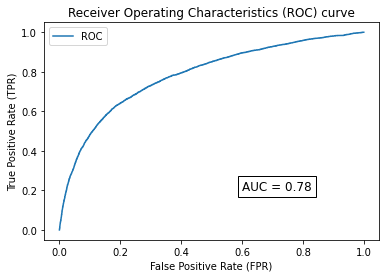

In [29]:
fpr,tpr,thresholds = roc_curve(y_test,y_preds_positive)

plt.plot(fpr,tpr,label='ROC')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristics (ROC) curve')
plt.text(0.6, 0.2, f'AUC = {auc:.2f}', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend();


In [30]:
%%time

model = CatBoostClassifier()

X_train = train_oversample.drop('defects',axis=1)
y_train = train_oversample['defects']

model.fit(X_train,y_train)

Learning rate set to 0.081175
0:	learn: 0.6701170	total: 15.5ms	remaining: 15.4s
1:	learn: 0.6515619	total: 29.2ms	remaining: 14.6s
2:	learn: 0.6359590	total: 42.2ms	remaining: 14s
3:	learn: 0.6233690	total: 54.6ms	remaining: 13.6s
4:	learn: 0.6127327	total: 66.8ms	remaining: 13.3s
5:	learn: 0.6030853	total: 79.4ms	remaining: 13.2s
6:	learn: 0.5955073	total: 93.1ms	remaining: 13.2s
7:	learn: 0.5887733	total: 107ms	remaining: 13.3s
8:	learn: 0.5832727	total: 121ms	remaining: 13.3s
9:	learn: 0.5783414	total: 134ms	remaining: 13.3s
10:	learn: 0.5743216	total: 148ms	remaining: 13.3s
11:	learn: 0.5712261	total: 162ms	remaining: 13.3s
12:	learn: 0.5683812	total: 175ms	remaining: 13.3s
13:	learn: 0.5659835	total: 189ms	remaining: 13.3s
14:	learn: 0.5640206	total: 203ms	remaining: 13.3s
15:	learn: 0.5622239	total: 216ms	remaining: 13.3s
16:	learn: 0.5606196	total: 230ms	remaining: 13.3s
17:	learn: 0.5593223	total: 243ms	remaining: 13.3s
18:	learn: 0.5579578	total: 257ms	remaining: 13.3s
19:	le

171:	learn: 0.5342264	total: 2.62s	remaining: 12.6s
172:	learn: 0.5341147	total: 2.63s	remaining: 12.6s
173:	learn: 0.5339981	total: 2.65s	remaining: 12.6s
174:	learn: 0.5339492	total: 2.67s	remaining: 12.6s
175:	learn: 0.5339110	total: 2.68s	remaining: 12.6s
176:	learn: 0.5337756	total: 2.7s	remaining: 12.5s
177:	learn: 0.5336160	total: 2.71s	remaining: 12.5s
178:	learn: 0.5335196	total: 2.73s	remaining: 12.5s
179:	learn: 0.5333643	total: 2.75s	remaining: 12.5s
180:	learn: 0.5332283	total: 2.76s	remaining: 12.5s
181:	learn: 0.5332165	total: 2.78s	remaining: 12.5s
182:	learn: 0.5330631	total: 2.79s	remaining: 12.5s
183:	learn: 0.5329454	total: 2.81s	remaining: 12.5s
184:	learn: 0.5327985	total: 2.83s	remaining: 12.5s
185:	learn: 0.5327008	total: 2.85s	remaining: 12.5s
186:	learn: 0.5326159	total: 2.86s	remaining: 12.4s
187:	learn: 0.5323831	total: 2.88s	remaining: 12.4s
188:	learn: 0.5322781	total: 2.89s	remaining: 12.4s
189:	learn: 0.5321233	total: 2.91s	remaining: 12.4s
190:	learn: 0

342:	learn: 0.5171897	total: 5.25s	remaining: 10.1s
343:	learn: 0.5171747	total: 5.26s	remaining: 10s
344:	learn: 0.5170278	total: 5.28s	remaining: 10s
345:	learn: 0.5168903	total: 5.29s	remaining: 10s
346:	learn: 0.5167881	total: 5.3s	remaining: 9.98s
347:	learn: 0.5167594	total: 5.32s	remaining: 9.96s
348:	learn: 0.5166658	total: 5.33s	remaining: 9.94s
349:	learn: 0.5165629	total: 5.34s	remaining: 9.93s
350:	learn: 0.5164557	total: 5.36s	remaining: 9.91s
351:	learn: 0.5163442	total: 5.37s	remaining: 9.89s
352:	learn: 0.5162599	total: 5.39s	remaining: 9.87s
353:	learn: 0.5161822	total: 5.4s	remaining: 9.86s
354:	learn: 0.5160956	total: 5.41s	remaining: 9.84s
355:	learn: 0.5160241	total: 5.43s	remaining: 9.82s
356:	learn: 0.5159556	total: 5.44s	remaining: 9.8s
357:	learn: 0.5157672	total: 5.46s	remaining: 9.79s
358:	learn: 0.5156309	total: 5.47s	remaining: 9.77s
359:	learn: 0.5155893	total: 5.48s	remaining: 9.75s
360:	learn: 0.5154744	total: 5.5s	remaining: 9.73s
361:	learn: 0.5152984	

510:	learn: 0.5027737	total: 7.65s	remaining: 7.32s
511:	learn: 0.5027624	total: 7.66s	remaining: 7.3s
512:	learn: 0.5026946	total: 7.68s	remaining: 7.29s
513:	learn: 0.5026502	total: 7.69s	remaining: 7.27s
514:	learn: 0.5026268	total: 7.7s	remaining: 7.25s
515:	learn: 0.5025035	total: 7.72s	remaining: 7.24s
516:	learn: 0.5024045	total: 7.73s	remaining: 7.22s
517:	learn: 0.5022858	total: 7.75s	remaining: 7.21s
518:	learn: 0.5022408	total: 7.76s	remaining: 7.19s
519:	learn: 0.5021719	total: 7.77s	remaining: 7.17s
520:	learn: 0.5021339	total: 7.78s	remaining: 7.16s
521:	learn: 0.5020922	total: 7.8s	remaining: 7.14s
522:	learn: 0.5019520	total: 7.81s	remaining: 7.12s
523:	learn: 0.5018281	total: 7.82s	remaining: 7.11s
524:	learn: 0.5017356	total: 7.84s	remaining: 7.09s
525:	learn: 0.5016425	total: 7.86s	remaining: 7.08s
526:	learn: 0.5015877	total: 7.87s	remaining: 7.06s
527:	learn: 0.5014894	total: 7.88s	remaining: 7.05s
528:	learn: 0.5013654	total: 7.9s	remaining: 7.03s
529:	learn: 0.50

677:	learn: 0.4896540	total: 10.1s	remaining: 4.78s
678:	learn: 0.4895650	total: 10.1s	remaining: 4.77s
679:	learn: 0.4894787	total: 10.1s	remaining: 4.75s
680:	learn: 0.4893647	total: 10.1s	remaining: 4.74s
681:	learn: 0.4892716	total: 10.1s	remaining: 4.72s
682:	learn: 0.4892134	total: 10.1s	remaining: 4.71s
683:	learn: 0.4891709	total: 10.2s	remaining: 4.69s
684:	learn: 0.4890040	total: 10.2s	remaining: 4.68s
685:	learn: 0.4889530	total: 10.2s	remaining: 4.67s
686:	learn: 0.4888471	total: 10.2s	remaining: 4.66s
687:	learn: 0.4887275	total: 10.2s	remaining: 4.64s
688:	learn: 0.4886835	total: 10.3s	remaining: 4.63s
689:	learn: 0.4885645	total: 10.3s	remaining: 4.62s
690:	learn: 0.4885358	total: 10.3s	remaining: 4.6s
691:	learn: 0.4884209	total: 10.3s	remaining: 4.59s
692:	learn: 0.4883428	total: 10.3s	remaining: 4.58s
693:	learn: 0.4882639	total: 10.4s	remaining: 4.56s
694:	learn: 0.4881718	total: 10.4s	remaining: 4.55s
695:	learn: 0.4881640	total: 10.4s	remaining: 4.53s
696:	learn: 0

840:	learn: 0.4774903	total: 12.5s	remaining: 2.36s
841:	learn: 0.4774462	total: 12.5s	remaining: 2.34s
842:	learn: 0.4773485	total: 12.5s	remaining: 2.33s
843:	learn: 0.4773275	total: 12.5s	remaining: 2.31s
844:	learn: 0.4772961	total: 12.5s	remaining: 2.3s
845:	learn: 0.4772349	total: 12.5s	remaining: 2.28s
846:	learn: 0.4771675	total: 12.6s	remaining: 2.27s
847:	learn: 0.4771304	total: 12.6s	remaining: 2.25s
848:	learn: 0.4770219	total: 12.6s	remaining: 2.24s
849:	learn: 0.4769221	total: 12.6s	remaining: 2.22s
850:	learn: 0.4768471	total: 12.6s	remaining: 2.21s
851:	learn: 0.4767979	total: 12.6s	remaining: 2.19s
852:	learn: 0.4766623	total: 12.6s	remaining: 2.18s
853:	learn: 0.4766017	total: 12.7s	remaining: 2.16s
854:	learn: 0.4765515	total: 12.7s	remaining: 2.15s
855:	learn: 0.4764977	total: 12.7s	remaining: 2.13s
856:	learn: 0.4763702	total: 12.7s	remaining: 2.12s
857:	learn: 0.4762982	total: 12.7s	remaining: 2.1s
858:	learn: 0.4762336	total: 12.7s	remaining: 2.09s
859:	learn: 0.

In [31]:
y_preds = model.predict_proba(X_test)
y_preds_positive=y_preds[:,1]

In [32]:
auc=roc_auc_score(y_test,y_preds_positive)
auc

0.7798782928340563

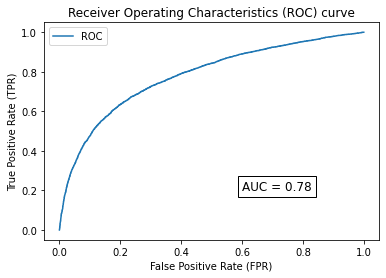

In [33]:
fpr,tpr,thresholds = roc_curve(y_test,y_preds_positive)

plt.plot(fpr,tpr,label='ROC')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristics (ROC) curve')
plt.text(0.6, 0.2, f'AUC = {auc:.2f}', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend();

In [34]:
y_preds = model.predict(X_test)

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84     15825
           1       0.47      0.65      0.54      4528

    accuracy                           0.76     20353
   macro avg       0.68      0.72      0.69     20353
weighted avg       0.79      0.76      0.77     20353



### XgBoost

In [35]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [36]:
from xgboost import XGBClassifier,XGBRFClassifier

model_xgboost = XGBClassifier()

X_train = train_oversample.drop('defects',axis=1)
y_train = train_oversample['defects']

model_xgboost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
y_preds = model_xgboost.predict_proba(X_test)
y_preds_positive=y_preds[:,1]

In [38]:
auc=roc_auc_score(y_test,y_preds_positive)
auc

0.7747585743472946

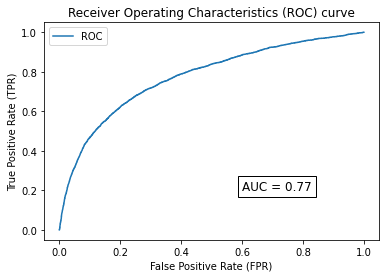

In [39]:
fpr,tpr,thresholds = roc_curve(y_test,y_preds_positive)

plt.plot(fpr,tpr,label='ROC')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristics (ROC) curve')
plt.text(0.6, 0.2, f'AUC = {auc:.2f}', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend();

In [40]:
model_xgRF = XGBRFClassifier()

X_train = train_oversample.drop('defects',axis=1)
y_train = train_oversample['defects']

model_xgRF.fit(X_train,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [41]:
y_preds = model_xgRF.predict_proba(X_test)
y_preds_positive=y_preds[:,1]

In [42]:
auc=roc_auc_score(y_test,y_preds_positive)
auc

0.7874109420617509

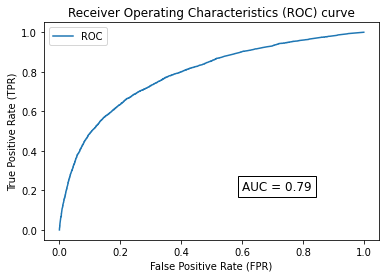

In [43]:
fpr,tpr,thresholds = roc_curve(y_test,y_preds_positive)

plt.plot(fpr,tpr,label='ROC')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristics (ROC) curve')
plt.text(0.6, 0.2, f'AUC = {auc:.2f}', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend();

In [44]:
y_preds = model_xgRF.predict(X_test)

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83     15825
           1       0.46      0.66      0.54      4528

    accuracy                           0.75     20353
   macro avg       0.68      0.72      0.69     20353
weighted avg       0.79      0.75      0.77     20353



## Process test data



In [46]:
df_test = pd.read_csv('test.csv')
df_test

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67837,169600,41.0,1.0,1.0,1.0,125.0,656.55,0.07,14.00,47.61,...,479.35,31,0,7,0,14.0,27.0,71.0,54.0,1.0
67838,169601,20.0,3.0,1.0,3.0,38.0,161.42,0.15,6.75,23.28,...,58.94,15,0,3,0,9.0,10.0,23.0,15.0,5.0
67839,169602,24.0,2.0,1.0,2.0,52.0,240.00,0.11,9.00,26.67,...,120.00,18,0,4,0,16.0,16.0,36.0,18.0,3.0
67840,169603,18.0,2.0,1.0,1.0,49.0,216.64,0.11,9.33,24.02,...,117.68,12,0,2,0,8.0,12.0,29.0,22.0,3.0


In [47]:
df_test1 = df_test.copy()
df_test1

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67837,169600,41.0,1.0,1.0,1.0,125.0,656.55,0.07,14.00,47.61,...,479.35,31,0,7,0,14.0,27.0,71.0,54.0,1.0
67838,169601,20.0,3.0,1.0,3.0,38.0,161.42,0.15,6.75,23.28,...,58.94,15,0,3,0,9.0,10.0,23.0,15.0,5.0
67839,169602,24.0,2.0,1.0,2.0,52.0,240.00,0.11,9.00,26.67,...,120.00,18,0,4,0,16.0,16.0,36.0,18.0,3.0
67840,169603,18.0,2.0,1.0,1.0,49.0,216.64,0.11,9.33,24.02,...,117.68,12,0,2,0,8.0,12.0,29.0,22.0,3.0


In [48]:
df_test1.drop('id',axis=1,inplace=True)

In [49]:
test_preds = model_xgRF.predict_proba(df_test1)
test_preds_positive=test_preds[:,1]
test_preds_positive

array([0.5714592 , 0.45331427, 0.8227681 , ..., 0.39328012, 0.29204598,
       0.8489725 ], dtype=float32)

In [50]:
#format predictions into the same format kaggle

df_preds = pd.DataFrame()

In [51]:
df_preds['id'] = df_test['id']
df_preds['defects'] = test_preds_positive
df_preds

,id,defects
0,101763,0.571459
1,101764,0.453314
2,101765,0.822768
3,101766,0.742565
4,101767,0.381365
...,...,...
67837,169600,0.584500
67838,169601,0.295101
67839,169602,0.393280
67840,169603,0.292046


In [52]:
df_preds.to_csv('Prediction3.csv',index=False)